<h2>Convert MOD10A1_GF and MOD10A1 albedo raster to 3-surface hyps and display</h2>

In [12]:
%pylab notebook
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from charistools.modelEnv import ModelEnv
configFile = '/Users/brodzik/2016_Almaty_training/modis_tiles_config.ini'
topDir = '/Users/brodzik/projects/CHARIS_FTP_copy/main_training/data'
myEnv = ModelEnv(tileConfigFile=configFile, topDir=topDir, verbose=True)

Populating the interactive namespace from numpy and matplotlib


charistools.modelEnv: read MODIS tile configuration from /Users/brodzik/2016_Almaty_training/modis_tiles_config.ini
charistools.modelEnv: model_top_dir changed to /Users/brodzik/projects/CHARIS_FTP_copy/main_training/data
charistools.modelEnv: read MODIS tile configuration from /Users/brodzik/2016_Almaty_training/modis_tiles_config.ini


In [13]:
from charistools.convertors import Fsca2Hypsometry
#help(Fsca2Hypsometry)

In [14]:
sol_hyps = Fsca2Hypsometry(drainageID="IN_Hunza_at_Danyour", year=2001, 
                            modelEnv=myEnv, fsca_area='SOL', verbose=True)
soi_hyps = Fsca2Hypsometry(drainageID="IN_Hunza_at_Danyour", year=2001, 
                           modelEnv=myEnv, fsca_area='SOI', verbose=True)
egi_hyps = Fsca2Hypsometry(drainageID="IN_Hunza_at_Danyour", year=2001, 
                           modelEnv=myEnv, fsca_area='EGI', verbose=True)

charistools.convertors : begin.
charistools.modelEnv: fixed_filename is /Users/brodzik/projects/CHARIS_FTP_copy/main_training/data/srtmgl3/CHARIS_DEM.v2.0.h23v05.tif
charistools.modelEnv: fixed_filename is /Users/brodzik/projects/CHARIS_FTP_copy/main_training/data/basin_masks/IN_Hunza_at_Danyour.basin_mask.h23v05.tif
charistools.modelEnv: fixed_filename is /Users/brodzik/projects/CHARIS_FTP_copy/main_training/data/modicev04/MODICE.v0.4.h23v05.1strike.min05yr.mask.nc
TileID: h23v05, date: year=2001, doy= 1
TileID: h23v05, date: year=2001, doy= 2
TileID: h23v05, date: year=2001, doy= 3
TileID: h23v05, date: year=2001, doy= 4
TileID: h23v05, date: year=2001, doy= 5
TileID: h23v05, date: year=2001, doy= 6
TileID: h23v05, date: year=2001, doy= 7
TileID: h23v05, date: year=2001, doy= 8
TileID: h23v05, date: year=2001, doy= 9
TileID: h23v05, date: year=2001, doy= 10
TileID: h23v05, date: year=2001, doy= 11
TileID: h23v05, date: year=2001, doy= 12
TileID: h23v05, date: year=2001, doy= 13
TileI

KeyboardInterrupt: 

In [16]:
drainageIDs = ['IN_Hunza_at_Danyour']
years = [2001, 2004]
thresholds = [0.46]
solFile = myEnv.hypsometry_filename(drainageID=drainageIDs[0], 
                                    type='snow_on_land_by_elevation', year=years[0])
soiFile = myEnv.hypsometry_filename(drainageID=drainageIDs[0], 
                                    type='snow_on_ice_by_elevation', year=years[0],
                                    ablation_method='albedo_mod10a1',
                                    threshold=thresholds[0])
egiFile = myEnv.hypsometry_filename(drainageID=drainageIDs[0], 
                                    type='exposed_glacier_ice_by_elevation', year=years[0],
                                    ablation_method='albedo_mod10a1',
                                    threshold=thresholds[0])
print(solFile)
print(soiFile)
print(egiFile)

/Users/brodzik/projects/CHARIS_FTP_copy/main_training/data/derived_hypsometries/IN_Hunza_at_Danyour.2001.0100m.snow_on_land_area_by_elev.txt
/Users/brodzik/projects/CHARIS_FTP_copy/main_training/data/derived_hypsometries/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MOD10A1.0046.snow_on_ice_area_by_elev.txt
/Users/brodzik/projects/CHARIS_FTP_copy/main_training/data/derived_hypsometries/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MOD10A1.0046.exposed_glacier_ice_area_by_elev.txt


In [17]:
sol_hyps.data.head()

1400.0    1500.0    1600.0    1700.0    1800.0    1900.0  \
Date                                                                     
2001-01-01  0.023612  0.008586  0.027906  0.062251  0.081570  0.139528   
2001-01-02  0.066544  0.019319  0.066544  0.109476  0.150261  0.352040   
2001-01-03  0.053665  0.015026  0.051518  0.092303  0.122355  0.354187   
2001-01-04  0.023612  0.006440  0.021466  0.079424  0.079424  0.266177   
2001-01-05  0.012880  0.012880  0.025759  0.103036  0.075131  0.210365   

              2000.0    2100.0    2200.0    2300.0    ...       5700.0  \
Date                                                  ...                
2001-01-01  0.216805  0.390679  0.912299  2.382711    ...     1.532663   
2001-01-02  0.476542  0.714813  1.521930  3.191974    ...     1.966273   
2001-01-03  0.444343  0.648269  1.341617  3.127577    ...     1.826745   
2001-01-04  0.379946  0.794237  1.135544  3.088938    ...     1.659311   
2001-01-05  0.444343  1.193502  1.300832  3.380874    ...     1.597060   

              5800.0    5900.0    6000.0    6100.0    6200.0    6300.0  \
Date                                                                     
2001-01-01  0.714813  1.485438  0.446490  0.429317  0.012880  0.980990   
2001-01-02  0.830729  1.485438  0.480835  0.429317  0.038639  0.987430   
2001-01-03  0.852195  1.485438  0.510888  0.429317  0.064398  0.991723   
2001-01-04  0.869368  1.485438  0.536647  0.429317  0.088010  0.998163   
2001-01-05  0.905860  1.485438  0.560259  0.429317  0.109476  1.002456   

            6400.0    6500.0    6600.0  
Date                                    
2001-01-01     0.0  0.214659  0.214659  
2001-01-02     0.0  0.214659  0.214659  
2001-01-03     0.0  0.214659  0.214659  
2001-01-04     0.0  0.214659  0.214659  
2001-01-05     0.0  0.214659  0.214659  

[5 rows x 53 columns]

In [18]:
soi_hyps.data.head()

2900.0    3000.0    3100.0    3200.0    3300.0    3400.0  \
Date                                                                     
2001-01-01  0.214659  0.429317  1.073293  2.361245  2.790563  4.250242   
2001-01-02  0.212512  0.429317  1.073293  1.717269  2.361245  4.213750   
2001-01-03  0.212512  0.429317  1.073293  1.502611  2.146587  3.687836   
2001-01-04  0.000000  0.429317  1.073293  1.502611  2.146587  3.226320   
2001-01-05  0.000000  0.429317  1.073293  1.502611  2.146587  3.698569   

              3500.0    3600.0    3700.0    3800.0    ...       6700.0  \
Date                                                  ...                
2001-01-01  3.578360  5.422278  4.499246  5.999710    ...     9.769117   
2001-01-02  3.619145  5.430864  4.484219  6.158557    ...     9.565191   
2001-01-03  2.762657  4.443434  4.222336  5.375053    ...     9.060743   
2001-01-04  2.322607  4.314639  4.198724  5.087411    ...     9.318332   
2001-01-05  2.754071  4.537884  4.222336  5.896674    ...     9.728331   

              6800.0    6900.0    7000.0    7100.0    7200.0    7300.0  \
Date                                                                     
2001-01-01  5.345001  6.987140  6.433320  4.613015  3.911081  3.230613   
2001-01-02  5.364320  6.783214  6.379655  4.615161  3.705009  3.234906   
2001-01-03  5.265577  6.830439  6.383949  4.615161  3.709302  3.243492   
2001-01-04  5.256991  7.098762  6.394682  4.619455  3.715742  3.462444   
2001-01-05  6.008296  7.133108  6.308819  4.409089  3.720035  3.468884   

              7400.0    7500.0    7600.0  
Date                                      
2001-01-01  0.858635  0.643976  0.643976  
2001-01-02  0.858635  0.643976  0.643976  
2001-01-03  0.858635  0.643976  0.643976  
2001-01-04  0.858635  0.643976  0.643976  
2001-01-05  0.858635  0.643976  0.643976  

[5 rows x 48 columns]

In [19]:
egi_hyps.data.head()

2900.0  3000.0  3100.0    3200.0    3300.0    3400.0    3500.0  \
Date                                                                           
2001-01-01  0.000000     0.0     0.0  0.000000  0.214659  1.210675  1.393135   
2001-01-02  0.000000     0.0     0.0  0.643976  0.643976  1.176330  1.736589   
2001-01-03  0.000000     0.0     0.0  0.858635  0.858635  1.605647  2.322607   
2001-01-04  0.210365     0.0     0.0  0.858635  0.858635  2.017792  2.472868   
2001-01-05  0.208219     0.0     0.0  0.858635  0.858635  1.545542  2.004912   

              3600.0    3700.0    3800.0    ...        6700.0    6800.0  \
Date                                        ...                           
2001-01-01  1.202089  1.586328  4.503539    ...     11.409108  9.320479   
2001-01-02  1.588474  2.129414  5.192593    ...     11.621620  9.217443   
2001-01-03  2.367685  2.517946  5.969658    ...     12.237691  9.260375   
2001-01-04  2.247476  2.507213  5.980391    ...     12.104602  9.183098   
2001-01-05  2.013498  2.427790  4.952175    ...     11.804080  8.339490   

              6900.0    7000.0    7100.0    7200.0    7300.0    7400.0  \
Date                                                                     
2001-01-01  5.855889  5.310656  4.353278  3.020248  1.287952  1.502611   
2001-01-02  6.132798  5.310656  4.361864  3.243493  1.287952  1.502611   
2001-01-03  6.171437  5.308509  4.368304  3.239199  1.287952  1.502611   
2001-01-04  5.988977  5.261284  4.366157  3.234906  1.073293  1.502611   
2001-01-05  6.027616  5.226939  4.565790  3.232760  1.073293  1.502611   

              7500.0    7600.0  
Date                            
2001-01-01  1.502611  0.858635  
2001-01-02  1.502611  0.858635  
2001-01-03  1.502611  0.858635  
2001-01-04  1.502611  0.858635  
2001-01-05  1.502611  0.858635  

[5 rows x 48 columns]

<IPython.core.display.Javascript object>


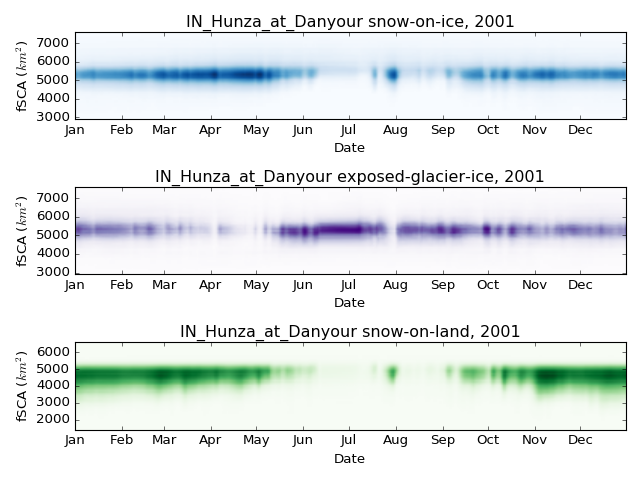

In [28]:
fig, ax = plt.subplots(3,1)
ax[0] = soi_hyps.imshow(ax[0], 
                        title='IN_Hunza_at_Danyour snow-on-ice, 2001',
                        cmap='Blues', xlabel='Date', dateFormat='%b', 
                        ylabel='fSCA ($km^2$)')
ax[1] = egi_hyps.imshow(ax[1], 
                        title='IN_Hunza_at_Danyour exposed-glacier-ice, 2001',
                        cmap='Purples', xlabel='Date', dateFormat='%b', 
                        ylabel='fSCA ($km^2$)')
ax[2] = sol_hyps.imshow(ax[2], 
                        title='IN_Hunza_at_Danyour snow-on-land, 2001',
                        cmap='Greens', xlabel='Date', dateFormat='%b', 
                        ylabel='fSCA ($km^2$)')
fig.tight_layout()

In [29]:
help(Fsca2Hypsometry)

Help on function Fsca2Hypsometry in module charistools.convertors:

Fsca2Hypsometry(drainageID, year, modelEnv, fsca_type='mod10a1_gf', fsca_area='total', ablation_method='albedo_mod10a1', threshold=0.46, start_doy=1, stop_doy=None, contour_m=100.0, outfile=None, decimal_places=2, verbose=False)
    Convert raster fractional SCA to Hypsometry for a specific
    drainageID.
    
    Uses input ModelEnv to read required input raster tile(s) for
    this drainageID and calculates fSCA_by_elevation at the requested
    contour levels.
    
    Default start/stop_doy are dates in the fSCA snow tile cube.
    
    Raises ValueError for invalid input combinations.
    Raises RuntimeError for errors reading input raster tile data.
    
    Args:
      drainageID: drainage name string to use in choosing input
        files to read, e.g. "IN_Hunza_at_Danyour" or "IN_Hunza_GDBD"
    
      year: integer, 4-digit year to use in choosing input files to
        read
    
      modelEnv: CHARIS Model